In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
from pandas.plotting import table
from matplotlib.lines import Line2D
import sys

# Set the seaborn style
sns.set(style="whitegrid")
# Add the path to the constants file to the system path
sys.path.append('../../')
from constants import *


# constants
MOVIELENS_1M = "MovieLens ML-1M"
AMAZON_BEAUTY = "Amazon Beauty"
FEATURE_TITLE = "title"
UNKNOWN_AMAZON_BEAUTY = "Unknown Amazon Beauty"
NO_DATA = "-"

# default all CF Fewshot methods has these parameters 
"""
# num_ratings_per_user
NUM_RATINGS_PER_USER = 1
# num_main_user_ratings
NUM_MAIN_USER_RATINGS = 4
# num_similar_users
NUM_SIMILAR_USERS = 4
"""


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


'\n# num_ratings_per_user\nNUM_RATINGS_PER_USER = 1\n# num_main_user_ratings\nNUM_MAIN_USER_RATINGS = 4\n# num_similar_users\nNUM_SIMILAR_USERS = 4\n'

In [6]:
# data from the papers
data = {
    "Methods": ["Paper's MF", "Paper's MLP", "Paper's (zero-shot)", "Paper's (few-shot)"],
    "Dataset": ["Unknown", "Unknown", UNKNOWN_AMAZON_BEAUTY, UNKNOWN_AMAZON_BEAUTY],
    "Features": [FEATURE_TITLE, FEATURE_TITLE, FEATURE_TITLE, FEATURE_TITLE],
    "RMSE": [1.1973, 1.3078, 1.4059, 1.0751],
    "CI_RMSE": [NO_DATA, NO_DATA, NO_DATA, NO_DATA],
    "StdError_RMSE": [NO_DATA, NO_DATA, NO_DATA, NO_DATA],
    "MAE": [0.9461, 0.9597, 1.1861, 0.6977],
    "CI_MAE": [NO_DATA, NO_DATA, NO_DATA, NO_DATA],
    "StdError_MAE": [NO_DATA, NO_DATA, NO_DATA, NO_DATA],
    "Wall Time": [NO_DATA, NO_DATA, NO_DATA, NO_DATA]
}

# Convert the existing data dictionary to a DataFrame
df = pd.DataFrame(data)

# New data to add
new_data = [
    {"Methods": "Thu's zero-shot GPT", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 1.1315, "CI_RMSE": "(1.1148, 1.1482)", "StdError_RMSE": 0.0002, 
     "MAE": 0.9922, "CI_MAE": "(0.9814, 1.0030)", "StdError_MAE": 0.0001, 
     "Wall Time": "1d 4h 38min 52s"},
    
    {"Methods": "Thu's few-shot GPT (1 test/user)", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 0.9362, "CI_RMSE": "(0.8892, 0.9846)", "StdError_RMSE": 0.0005, 
     "MAE": 0.5809, "CI_MAE": "(0.5453, 0.6166)", "StdError_MAE": 0.0004, 
     "Wall Time": "3h 3min 8s"},

    # {"Methods": "Thu's zero-shot", "Dataset": "MovieLens", "Features": FEATURE_TITLE, 
    #  "RMSE": 2.1204, "CI_RMSE": "(2.0606, 2.1791)", "StdError_RMSE": 0.0006, 
    #  "MAE": 1.4233, "CI_MAE": "(1.3714, 1.4757)", "StdError_MAE": 0.0005, 
    #  "Wall Time": "7h 32min 44s"},

    # {"Methods": "Thu's few-shot GPT (1 test/user) MovieLens", "Dataset": "MovieLens", "Features": FEATURE_TITLE, 
    #  "RMSE": 0.9587, "CI_RMSE": "(0.7071, 1.2107)", "StdError_RMSE": 0.0025, 
    #  "MAE": 0.7743, "CI_MAE": "(0.5455, 1.0227)", "StdError_MAE": 0.0024, 
    #  "Wall Time": "2min 26s"}
]


# New additional evaluation data
additional_data = [
    {"Methods": "Thu's CF GPT", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 2.0794, "CI_RMSE": "(2.0328, 2.1269)", "StdError_RMSE": 0.0005, 
     "MAE": 1.8354, "CI_MAE": "(1.7879, 1.8840)", "StdError_MAE": 0.0005, 
     "Wall Time": "28min 40s"},
    
    {"Methods": "Thu's CF GPT", "Dataset": MOVIELENS_1M, "Features": FEATURE_TITLE, 
     "RMSE": 1.2885, "CI_RMSE": "(1.2672, 1.3102)", "StdError_RMSE": 0.0002, 
     "MAE": 1.0032, "CI_MAE": "(0.9826, 1.0238)", "StdError_MAE": 0.0002, 
     "Wall Time": "1h 20min 18s"}
]

# Append the new data
df = pd.concat([df, pd.DataFrame(new_data), pd.DataFrame(additional_data)], ignore_index=True)

# Additional entries to be added
more_data = [
    {"Methods": "Thu's Few shot CF GPT", "Dataset": MOVIELENS_1M, "Features": FEATURE_TITLE, 
     "RMSE": 0.4258, "CI_RMSE": "(0.4119, 0.4399)", "StdError_RMSE": 0.0001, 
     "MAE": 0.1744, "CI_MAE": "(0.1646, 0.1843)", "StdError_MAE": 0.0001, 
     "Wall Time": "7h 44min 46s"},
    
    {"Methods": "Thu's Few shot CF GPT", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 0.4182, "CI_RMSE": "(0.3067, 0.5258)", "StdError_RMSE": 0.0011, 
     "MAE": 0.0600, "CI_MAE": "(0.0410, 0.0821)", "StdError_MAE": 0.0002, 
     "Wall Time": "7h 44min 46s"},
    
    
    {"Methods": "Thu's zero-shot", "Dataset": MOVIELENS_1M, "Features": FEATURE_TITLE, 
     "RMSE": 1.5641, "CI_RMSE": "(1.5259, 1.6030)", "StdError_RMSE": 0.0004, 
     "MAE": 1.0816, "CI_MAE": "(1.0534, 1.1109)", "StdError_MAE": 0.0003, 
     "Wall Time": "1d 6h 11min 18s"},
    
    {"Methods": "Thu's zero-shot", "Dataset": MOVIELENS_1M, "Features": FEATURE_TITLE, 
     "RMSE": 1.4033, "CI_RMSE": "(1.3795, 1.4271)", "StdError_RMSE": 0.0002, 
     "MAE": 1.1079, "CI_MAE": "(1.0863, 1.1293)", "StdError_MAE": 0.0002, 
     "Wall Time": "1d 1h 20min 27s"},
    
    {"Methods": "Thu's Few shot CF GPT: 6 similar users, 3/similar user", "Dataset": MOVIELENS_1M, "Features": FEATURE_TITLE, 
     "RMSE": 0.4726, "CI_RMSE": "(0.4569, 0.4891)", "StdError_RMSE": 0.0002, 
     "MAE": 0.2032, "CI_MAE": "(0.1925, 0.2139)", "StdError_MAE": 0.0001, 
     "Wall Time": "1h 29min 7s"},
    
    {"Methods": "Thu's Few shot CF GPT: 6 similar users", "Dataset": MOVIELENS_1M, "Features": FEATURE_TITLE, 
     "RMSE": 0.4364, "CI_RMSE": "(0.4225, 0.4507)", "StdError_RMSE": 0.0001, 
     "MAE": 0.1813, "CI_MAE": "(0.1714, 0.1911)", "StdError_MAE": 0.0001, 
     "Wall Time": "1h 31min 47s"},
    
    {"Methods": "Thu's Few shot CF GPT: 3/similar user", "Dataset": MOVIELENS_1M, "Features": FEATURE_TITLE, 
     "RMSE": 0.4756, "CI_RMSE": "(0.4598, 0.4922)", "StdError_RMSE": 0.0002, 
     "MAE": 0.2067, "CI_MAE": "(0.1960, 0.2174)", "StdError_MAE": 0.0001, 
     "Wall Time": "3h 16min 48s"},
    
    {"Methods": "Thu's Few shot CF GPT: 3/similar user", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 0.3367, "CI_RMSE": "(0.2686, 0.4044)", "StdError_RMSE": 0.0007, 
     "MAE": 0.0637, "CI_MAE": "(0.0479, 0.0808)", "StdError_MAE": 0.0002, 
     "Wall Time": "28min 4s"},
    
    {"Methods": "Thu's Few shot CF GPT: 6 similar users", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 0.2456, "CI_RMSE": "(0.1668, 0.3278)", "StdError_RMSE": 0.0008, 
     "MAE": 0.0342, "CI_MAE": "(0.0230, 0.0470)", "StdError_MAE": 0.0001, 
     "Wall Time": "26min 41s"},
    
    {"Methods": "Thu's sorted Few shot CF GPT", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 0.7055, "CI_RMSE": "(0.6435, 0.7674)", "StdError_RMSE": 0.0006, 
     "MAE": 0.3354, "CI_MAE": "(0.3042, 0.3673)", "StdError_MAE": 0.0003, 
     "Wall Time": "1h 31min 4s"},
    
    {"Methods": "Thu's sorted timestamp Few shot CF GPT", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 0.7736, "CI_RMSE": "(0.7145, 0.8338)", "StdError_RMSE": 0.0006, 
     "MAE": 0.3858, "CI_MAE": "(0.3543, 0.4184)", "StdError_MAE": 0.0003, 
     "Wall Time": ""},
    
    {"Methods": "Thu's sorted timestamp MF Few shot CF GPT", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 0.7817, "CI_RMSE": "(0.7269, 0.8380)", "StdError_RMSE": 0.0006, 
     "MAE": 0.3873, "CI_MAE": "(0.3580, 0.4195)", "StdError_MAE": 0.0003, 
     "Wall Time": "29min 44s"},
    
    {"Methods": "Thu's random MF Few shot CF GPT", "Dataset": AMAZON_BEAUTY, "Features": FEATURE_TITLE, 
     "RMSE": 0.7385, "CI_RMSE": "(0.6747, 0.8035)", "StdError_RMSE": 0.0006, 
     "MAE": 0.3272, "CI_MAE": "(0.2954, 0.3607)", "StdError_MAE": 0.0003, 
     "Wall Time": "25min 56s"},

]


# Append the new data to the DataFrame
df = pd.concat([df, pd.DataFrame(more_data)], ignore_index=True)

# Export table to LaTeX
df.style.to_latex("../latex/amazon_table.tex")

# Display the best RMSE & MAE
best_rmse = df['RMSE'].min()
best_mae = df['MAE'].min()
print(f'The best RMSE is {best_rmse} and the best MAE is {best_mae}')

# Display the worst RMSE & MAE
worst_rmse = df['RMSE'].max()
worst_mae = df['MAE'].max()
print(f'The worst RMSE is {worst_rmse} and the worst MAE is {worst_mae}')

df


The best RMSE is 0.2456 and the best MAE is 0.0342
The worst RMSE is 2.0794 and the worst MAE is 1.8354


,Methods,Dataset,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
0,Paper's MF,Unknown,title,1.1973,-,-,0.9461,-,-,-
1,Paper's MLP,Unknown,title,1.3078,-,-,0.9597,-,-,-
2,Paper's (zero-shot),Unknown Amazon Beauty,title,1.4059,-,-,1.1861,-,-,-
3,Paper's (few-shot),Unknown Amazon Beauty,title,1.0751,-,-,0.6977,-,-,-
4,Thu's zero-shot GPT,Amazon Beauty,title,1.1315,"(1.1148, 1.1482)",0.0002,0.9922,"(0.9814, 1.0030)",0.0001,1d 4h 38min 52s
5,Thu's few-shot GPT (1 test/user),Amazon Beauty,title,0.9362,"(0.8892, 0.9846)",0.0005,0.5809,"(0.5453, 0.6166)",0.0004,3h 3min 8s
6,Thu's CF GPT,Amazon Beauty,title,2.0794,"(2.0328, 2.1269)",0.0005,1.8354,"(1.7879, 1.8840)",0.0005,28min 40s
7,Thu's CF GPT,MovieLens ML-1M,title,1.2885,"(1.2672, 1.3102)",0.0002,1.0032,"(0.9826, 1.0238)",0.0002,1h 20min 18s
8,Thu's Few shot CF GPT,MovieLens ML-1M,title,0.4258,"(0.4119, 0.4399)",0.0001,0.1744,"(0.1646, 0.1843)",0.0001,7h 44min 46s
9,Thu's Few shot CF GPT,Amazon Beauty,title,0.4182,"(0.3067, 0.5258)",0.0011,0.0600,"(0.0410, 0.0821)",0.0002,7h 44min 46s


In [16]:
# Filter for CF methods
all_cf_methods = df[df['Methods'].str.contains('timestamp')]

# Display the CF methods
all_cf_methods


,Methods,Dataset,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time,color
18,Thu's sorted timestamp Few shot CF GPT,Amazon Beauty,title,0.7736,"(0.7145, 0.8338)",0.0006,0.3858,"(0.3543, 0.4184)",0.0003,,"(0.5846471924909513, 0.7912078800834269, 0.938..."
19,Thu's sorted timestamp MF Few shot CF GPT,Amazon Beauty,title,0.7722,"(0.7141, 0.8314)",0.0006,0.3625,"(0.3322, 0.3947)",0.0003,28min 38s,"(0.5846471924909513, 0.7912078800834269, 0.938..."


In [8]:
# Large Amazon
df_large = df[(df["Dataset"] == AMAZON_BEAUTY) | (df["Dataset"] == UNKNOWN_AMAZON_BEAUTY)]
df_large = df_large.drop(columns=["Dataset"])
df_AmazonBeauty = df_large.set_index("Methods")

# best RMSE & MAE
print(f'The best RMSE is {df_AmazonBeauty["RMSE"].min()} and the best MAE is {df_AmazonBeauty["MAE"].min()}')

# export table latex
df_AmazonBeauty.style.to_latex("../latex/df_AmazonBeauty.tex")

df_AmazonBeauty


The best RMSE is 0.2456 and the best MAE is 0.0342


,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,
Paper's (zero-shot),title,1.4059,-,-,1.1861,-,-,-
Paper's (few-shot),title,1.0751,-,-,0.6977,-,-,-
Thu's zero-shot GPT,title,1.1315,"(1.1148, 1.1482)",0.0002,0.9922,"(0.9814, 1.0030)",0.0001,1d 4h 38min 52s
Thu's few-shot GPT (1 test/user),title,0.9362,"(0.8892, 0.9846)",0.0005,0.5809,"(0.5453, 0.6166)",0.0004,3h 3min 8s
Thu's CF GPT,title,2.0794,"(2.0328, 2.1269)",0.0005,1.8354,"(1.7879, 1.8840)",0.0005,28min 40s
Thu's Few shot CF GPT,title,0.4182,"(0.3067, 0.5258)",0.0011,0.0600,"(0.0410, 0.0821)",0.0002,7h 44min 46s
Thu's Few shot CF GPT: 3/similar user,title,0.3367,"(0.2686, 0.4044)",0.0007,0.0637,"(0.0479, 0.0808)",0.0002,28min 4s
Thu's Few shot CF GPT: 6 similar users,title,0.2456,"(0.1668, 0.3278)",0.0008,0.0342,"(0.0230, 0.0470)",0.0001,26min 41s
Thu's sorted Few shot CF GPT,title,0.7055,"(0.6435, 0.7674)",0.0006,0.3354,"(0.3042, 0.3673)",0.0003,1h 31min 4s


In [9]:
# MovieLens 1M data
df_large = df[(df["Dataset"] == MOVIELENS_1M)]
df_large = df_large.drop(columns=["Dataset"])
df_MovieLens1M = df_large.set_index("Methods")
# best RMSE & MAE
print(f'The best RMSE is {df_MovieLens1M["RMSE"].min()} and the best MAE is {df_MovieLens1M["MAE"].min()}')
# export table latex
df_MovieLens1M.style.to_latex("../latex/df_MovieLens1M.tex")
df_MovieLens1M


The best RMSE is 0.4258 and the best MAE is 0.1744


,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,
Thu's CF GPT,title,1.2885,"(1.2672, 1.3102)",0.0002,1.0032,"(0.9826, 1.0238)",0.0002,1h 20min 18s
Thu's Few shot CF GPT,title,0.4258,"(0.4119, 0.4399)",0.0001,0.1744,"(0.1646, 0.1843)",0.0001,7h 44min 46s
Thu's zero-shot,title,1.5641,"(1.5259, 1.6030)",0.0004,1.0816,"(1.0534, 1.1109)",0.0003,1d 6h 11min 18s
Thu's zero-shot,title,1.4033,"(1.3795, 1.4271)",0.0002,1.1079,"(1.0863, 1.1293)",0.0002,1d 1h 20min 27s
"Thu's Few shot CF GPT: 6 similar users, 3/similar user",title,0.4726,"(0.4569, 0.4891)",0.0002,0.2032,"(0.1925, 0.2139)",0.0001,1h 29min 7s
Thu's Few shot CF GPT: 6 similar users,title,0.4364,"(0.4225, 0.4507)",0.0001,0.1813,"(0.1714, 0.1911)",0.0001,1h 31min 47s
Thu's Few shot CF GPT: 3/similar user,title,0.4756,"(0.4598, 0.4922)",0.0002,0.2067,"(0.1960, 0.2174)",0.0001,3h 16min 48s


In [10]:
# MOVIELENS_1M Data CF Fewshot methods

df_large = df[(df["Dataset"] == MOVIELENS_1M)]
df_large = df_large.drop(columns=["Dataset"])
# Filter for CF methods
df_large = df_large[df_large['Methods'].str.contains('CF')]
df_CF_Fewshot_movie1M = df_large.set_index("Methods")
# best RMSE & MAE
print(f'The best RMSE is {df_CF_Fewshot_movie1M["RMSE"].min()} and the best MAE is {df_CF_Fewshot_movie1M["MAE"].min()}')
# export table latex
df_CF_Fewshot_movie1M.style.to_latex("../latex/df_CF_Fewshot_movie1M.tex")
df_CF_Fewshot_movie1M

The best RMSE is 0.4258 and the best MAE is 0.1744


,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,
Thu's CF GPT,title,1.2885,"(1.2672, 1.3102)",0.0002,1.0032,"(0.9826, 1.0238)",0.0002,1h 20min 18s
Thu's Few shot CF GPT,title,0.4258,"(0.4119, 0.4399)",0.0001,0.1744,"(0.1646, 0.1843)",0.0001,7h 44min 46s
"Thu's Few shot CF GPT: 6 similar users, 3/similar user",title,0.4726,"(0.4569, 0.4891)",0.0002,0.2032,"(0.1925, 0.2139)",0.0001,1h 29min 7s
Thu's Few shot CF GPT: 6 similar users,title,0.4364,"(0.4225, 0.4507)",0.0001,0.1813,"(0.1714, 0.1911)",0.0001,1h 31min 47s
Thu's Few shot CF GPT: 3/similar user,title,0.4756,"(0.4598, 0.4922)",0.0002,0.2067,"(0.1960, 0.2174)",0.0001,3h 16min 48s


In [11]:
# Amazon Beauty Data: CF Fewshot methods

df_large = df[(df["Dataset"] == AMAZON_BEAUTY) | (df["Dataset"] == UNKNOWN_AMAZON_BEAUTY)]
df_large = df_large.drop(columns=["Dataset"])
# Filter for CF methods
df_large = df_large[df_large['Methods'].str.contains('CF')]
df_CF_Fewshot_AmazonBeauty = df_large.set_index("Methods")
# best RMSE & MAE
print(f'The best RMSE is {df_CF_Fewshot_AmazonBeauty["RMSE"].min()} and the best MAE is {df_CF_Fewshot_AmazonBeauty["MAE"].min()}')
# export table latex
df_CF_Fewshot_AmazonBeauty.style.to_latex("../latex/df_CF_Fewshot_AmazonBeauty.tex")
df_CF_Fewshot_AmazonBeauty

The best RMSE is 0.2456 and the best MAE is 0.0342


,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,
Thu's CF GPT,title,2.0794,"(2.0328, 2.1269)",0.0005,1.8354,"(1.7879, 1.8840)",0.0005,28min 40s
Thu's Few shot CF GPT,title,0.4182,"(0.3067, 0.5258)",0.0011,0.0600,"(0.0410, 0.0821)",0.0002,7h 44min 46s
Thu's Few shot CF GPT: 3/similar user,title,0.3367,"(0.2686, 0.4044)",0.0007,0.0637,"(0.0479, 0.0808)",0.0002,28min 4s
Thu's Few shot CF GPT: 6 similar users,title,0.2456,"(0.1668, 0.3278)",0.0008,0.0342,"(0.0230, 0.0470)",0.0001,26min 41s
Thu's sorted Few shot CF GPT,title,0.7055,"(0.6435, 0.7674)",0.0006,0.3354,"(0.3042, 0.3673)",0.0003,1h 31min 4s
Thu's sorted timestamp Few shot CF GPT,title,0.7736,"(0.7145, 0.8338)",0.0006,0.3858,"(0.3543, 0.4184)",0.0003,
Thu's sorted timestamp MF Few shot CF GPT,title,0.7722,"(0.7141, 0.8314)",0.0006,0.3625,"(0.3322, 0.3947)",0.0003,28min 38s
Thu's random MF Few shot CF GPT,title,0.7385,"(0.6747, 0.8035)",0.0006,0.3272,"(0.2954, 0.3607)",0.0003,25min 56s


In [12]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

# Table from DataFrame
tab = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))

# Adjust table
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)

plt.box(on=None)

# Save the figure as an image
image_path = "../images/evaluation_table.png"
plt.savefig(image_path, bbox_inches='tight', dpi=300)

# Close the plt object to prevent it from displaying in the output cell
plt.close()


Plot saved


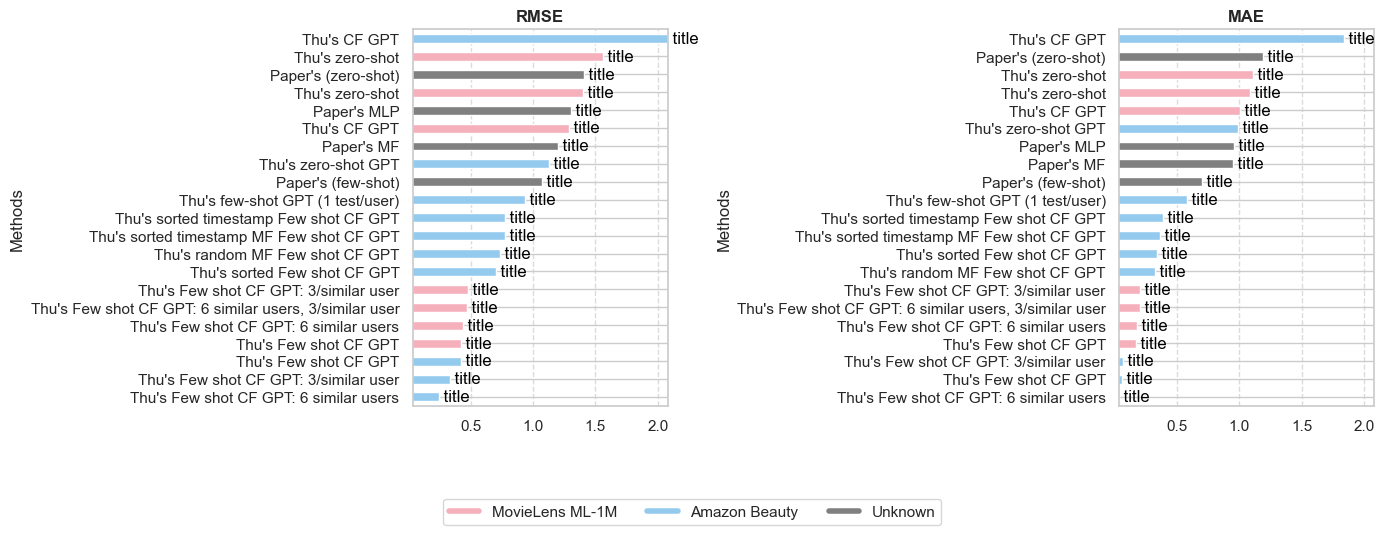

In [13]:
# Choose a colorblind-friendly palette that includes pink
base_palette = sns.color_palette("husl", 3)
small_amazon_base_color = base_palette[0]  # Base color for Small Amazon
large_amazon_base_color = base_palette[2]  # Base color for Large Amazon

# Create lighter colors
small_amazon_color = sns.light_palette(small_amazon_base_color, n_colors=3)[-2]  # Lighter color for Small Amazon
large_amazon_color = sns.light_palette(large_amazon_base_color, n_colors=3)[-2]  # Lighter color for Large Amazon

# Create a color map: a dictionary that maps each unique value in 'Dataset' to a color
color_map = {MOVIELENS_1M: small_amazon_color, AMAZON_BEAUTY: large_amazon_color}

# Map the 'Dataset' column to colors using the color map, handling NaN values
df['color'] = df['Dataset'].map(color_map).fillna("grey")  # Grey color for NaN values

# Update the max and min scale of RMSE and MAE
max_rmse_mae = max(df['RMSE'].max(), df['MAE'].max())
min_rmse_mae = min(df['RMSE'].min(), df['MAE'].min())

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # Changed to 1 row, 2 columns

# RMSE Plot
df.sort_values(by="RMSE").plot.barh(x="Methods", y="RMSE", ax=ax[0], legend=False, color=df.sort_values(by="RMSE")['color'])
ax[0].set_title("RMSE", fontweight='bold')
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[0].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar in the RMSE plot
for index, value in enumerate(df.sort_values(by="RMSE")['RMSE']):
    ax[0].text(value, index, ' ' + df.sort_values(by="RMSE")['Features'].iloc[index], color='black', va="center")

# MAE Plot
df.sort_values(by="MAE").plot.barh(x="Methods", y="MAE", ax=ax[1], legend=False, color=df.sort_values(by="MAE")['color'])
ax[1].set_title("MAE", fontweight='bold')
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar in the MAE plot
for index, value in enumerate(df.sort_values(by="MAE")['MAE']):
    ax[1].text(value, index, ' ' + df.sort_values(by="MAE")['Features'].iloc[index], color='black', va="center")


# Add legend
legend_elements = [Line2D([0], [0], color=small_amazon_color, lw=4, label=MOVIELENS_1M),
                   Line2D([0], [0], color=large_amazon_color, lw=4, label=AMAZON_BEAUTY),
                   Line2D([0], [0], color='grey', lw=4, label='Unknown')]

# Adjusted legend position
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusted layout
plt.savefig('../images/comparison_plot.png', bbox_inches='tight')  # Save with tight bounding box
print("Plot saved")
plt.show()

Plot saved


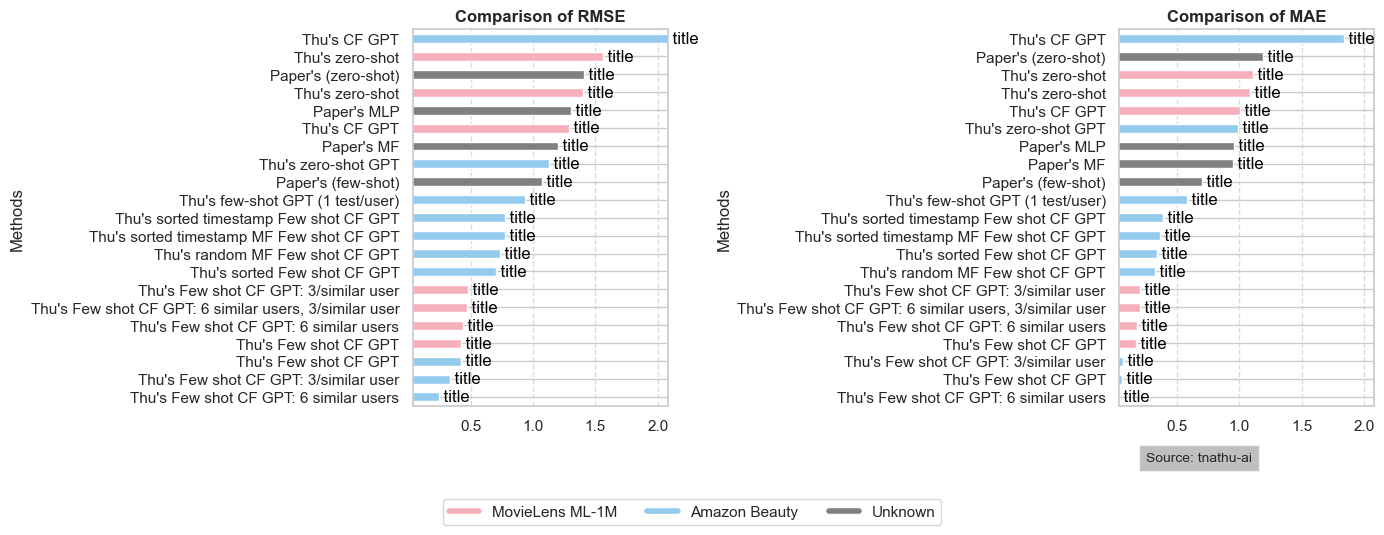

In [14]:


# Choose a colorblind-friendly palette that includes pink
base_palette = sns.color_palette("husl", 3)
small_amazon_base_color = base_palette[0]  # Base color for Small Amazon
large_amazon_base_color = base_palette[2]  # Base color for Large Amazon

# Create lighter colors
small_amazon_color = sns.light_palette(small_amazon_base_color, n_colors=3)[-2]  # Lighter color for Small Amazon
large_amazon_color = sns.light_palette(large_amazon_base_color, n_colors=3)[-2]  # Lighter color for Large Amazon

# Create a color map: a dictionary that maps each unique value in 'Dataset' to a color
color_map = {MOVIELENS_1M: small_amazon_color, AMAZON_BEAUTY: large_amazon_color}

# Map the 'Dataset' column to colors using the color map, handling NaN values
df['color'] = df['Dataset'].map(color_map).fillna("grey")  # Grey color for NaN values

# Update the max and min scale of RMSE and MAE
max_rmse_mae = max(df['RMSE'].max(), df['MAE'].max())
min_rmse_mae = min(df['RMSE'].min(), df['MAE'].min())

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # Changed to 1 row, 2 columns

# RMSE Plot
df.sort_values(by="RMSE").plot.barh(x="Methods", y="RMSE", ax=ax[0], legend=False, color=df.sort_values(by="RMSE")['color'])
ax[0].set_title("Comparison of RMSE", fontweight='bold')
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[0].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar in the RMSE plot
for index, value in enumerate(df.sort_values(by="RMSE")['RMSE']):
    ax[0].text(value, index, ' ' + df.sort_values(by="RMSE")['Features'].iloc[index], color='black', va="center")

# MAE Plot
df.sort_values(by="MAE").plot.barh(x="Methods", y="MAE", ax=ax[1], legend=False, color=df.sort_values(by="MAE")['color'])
ax[1].set_title("Comparison of MAE", fontweight='bold')
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar in the MAE plot
for index, value in enumerate(df.sort_values(by="MAE")['MAE']):
    ax[1].text(value, index, ' ' + df.sort_values(by="MAE")['Features'].iloc[index], color='black', va="center")

# Add legend
legend_elements = [Line2D([0], [0], color=small_amazon_color, lw=4, label=MOVIELENS_1M),
                   Line2D([0], [0], color=large_amazon_color, lw=4, label=AMAZON_BEAUTY),
                   Line2D([0], [0], color='grey', lw=4, label='Unknown')]

# Adjusted legend position
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Citing the source to the right below the plot
plt.figtext(0.9, 0.01, "Source: tnathu-ai", ha="right", fontsize=10, bbox={"facecolor":"grey", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusted layout
# plt.savefig('../images/comparison_plot.png', bbox_inches='tight')  # Save with tight bounding box
print("Plot saved")
plt.show()

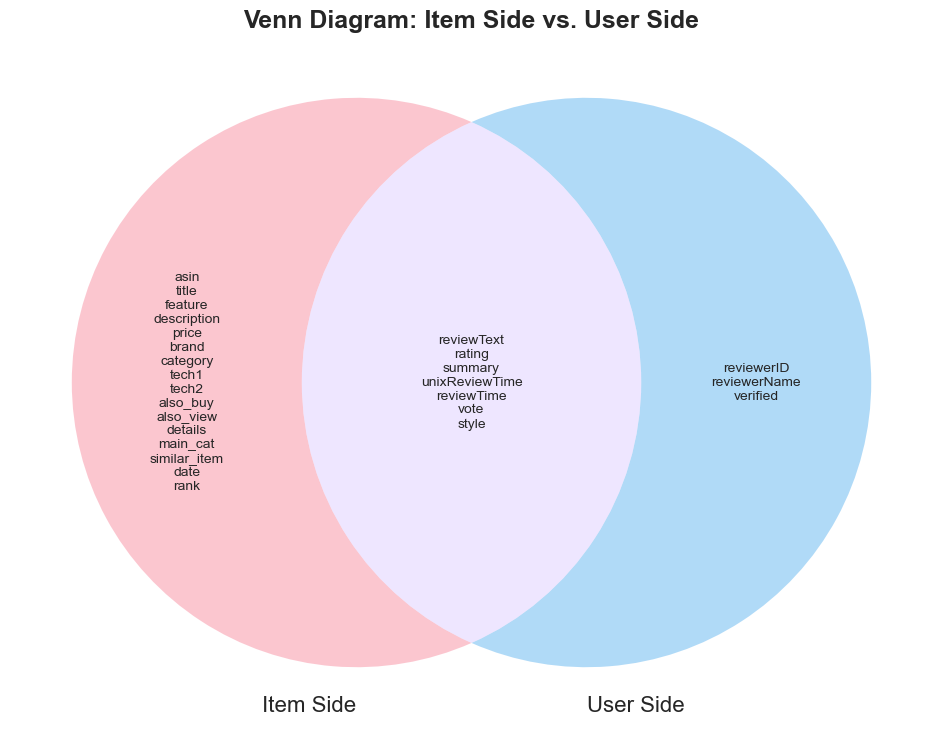

In [15]:
# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette 
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE_AMAZON_BEAUTY))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE_AMAZON_BEAUTY))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE_AMAZON_BEAUTY))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
plt.show()


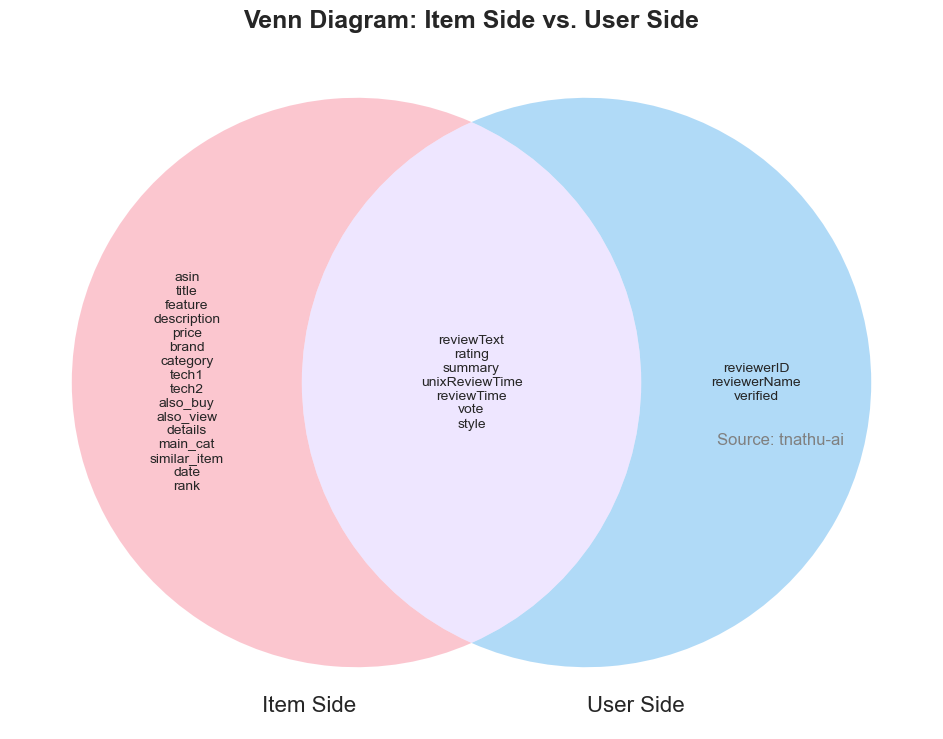

In [10]:
# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette that includes pink
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE_AMAZON_BEAUTY))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE_AMAZON_BEAUTY))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE_AMAZON_BEAUTY))

# Add the source citation in gray
plt.text(0.5, -0.1, "Source: tnathu-ai", fontsize=12, color='gray', ha='center')

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
# plt.savefig('../images/interaction_venn_diagram.png')  # Save the plot
plt.show()


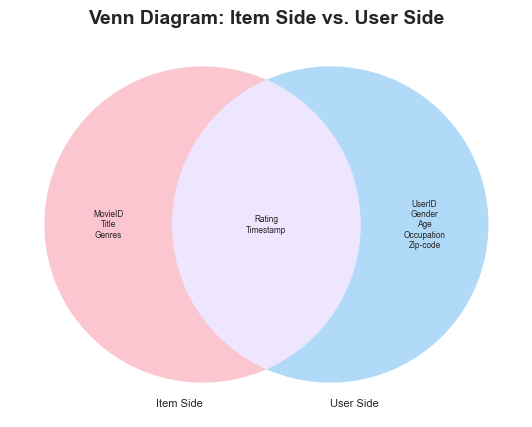

In [13]:
# Item-side attributes useful for prediction and training
ITEM_SIDE_MOVIELENS = ["MovieID", "Title", "Genres"]

# Interaction-side attributes for training (not for prediction)
INTERACTION_SIDE_MOVIELENS = ["Rating", "Timestamp"]

# User-side attributes for training (not for prediction)
USER_SIDE_MOVIELENS = ["UserID", "Gender", "Age", "Occupation", "Zip-code"]


# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette 
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(8, 5))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(8)
for text in venn.subset_labels:
    text.set_fontsize(6)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE_MOVIELENS))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE_MOVIELENS))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE_MOVIELENS))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=14, fontweight='bold')
plt.show()
